<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_BinarySearchTreeWithOptimizedTraversal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a binary search tree, find the floor and ceiling of a given integer. The floor is the highest element in the tree less than or equal to an integer, while the ceiling is the lowest element in the tree greater than or equal to an integer.

If either value does not exist, return None.

##Solution:


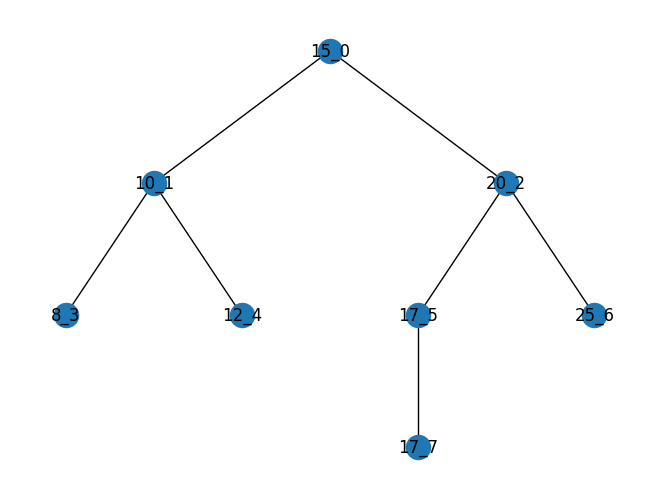

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# TreeNode class with a unique identifier
class TreeNode:
    def __init__(self, value, id):
        self.value = value
        self.id = id
        self.left = None
        self.right = None

# BinarySearchTree class with methods for insertion and graph conversion
class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.node_count = 0

    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value, self.node_count)
            self.node_count += 1
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value or (value == node.value and node.left is None):
            if node.left is None:
                node.left = TreeNode(value, self.node_count)
                self.node_count += 1
            else:
                self._insert_recursive(node.left, value)
        else:
            if node.right is None:
                node.right = TreeNode(value, self.node_count)
                self.node_count += 1
            else:
                self._insert_recursive(node.right, value)

    def to_networkx_graph(self):
        graph = nx.DiGraph()
        if self.root:
            self._add_edges(graph, self.root)
        return graph

    def _add_edges(self, graph, node):
        node_label = f"{node.value}_{node.id}"
        if node.left:
            left_label = f"{node.left.value}_{node.left.id}"
            graph.add_edge(node_label, left_label)
            self._add_edges(graph, node.left)
        if node.right:
            right_label = f"{node.right.value}_{node.right.id}"
            graph.add_edge(node_label, right_label)
            self._add_edges(graph, node.right)

# Function to plot the binary search tree
def plot_tree(tree):
    graph = tree.to_networkx_graph()
    pos = hierarchy_pos(graph, f"{tree.root.value}_{tree.root.id}")
    nx.draw(graph, pos, with_labels=True, arrows=False)
    plt.show()

# Custom function for hierarchical tree layout
def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None):
        if pos is None:
            pos = {root: (xcenter, vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)

        neighbors = list(G.neighbors(root))
        if len(neighbors) != 0:
            dx = width / len(neighbors)
            nextx = xcenter - width/2 - dx/2
            for neighbor in neighbors:
                nextx += dx
                pos = _hierarchy_pos(G, neighbor, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos)
        return pos

    return _hierarchy_pos(G, root, width=width, vert_gap=vert_gap, vert_loc=vert_loc, xcenter=xcenter)

# Create and plot the binary search tree
bst = BinarySearchTree()
for value in [15, 10, 20, 8, 12, 17, 25, 17]:  # Including a duplicate value
    bst.insert(value)

plot_tree(bst)



In [1]:
class TreeNode:
    def __init__(self, value, id):
        self.value = value
        self.id = id
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.node_count = 0

    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value, self.node_count)
            self.node_count += 1
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value <= node.value:
            if node.left is None:
                node.left = TreeNode(value, self.node_count)
                self.node_count += 1
            else:
                self._insert_recursive(node.left, value)
        else:
            if node.right is None:
                node.right = TreeNode(value, self.node_count)
                self.node_count += 1
            else:
                self._insert_recursive(node.right, value)

    def find_floor(self, key):
        return self._find_floor(self.root, key, None)

    def _find_floor(self, node, key, floor):
        if node is None:
            return floor
        if node.value == key:
            return node.value
        if key < node.value:
            return self._find_floor(node.left, key, floor)
        return self._find_floor(node.right, key, node.value)

    def find_ceiling(self, key):
        return self._find_ceiling(self.root, key, None)

    def _find_ceiling(self, node, key, ceil):
        if node is None:
            return ceil
        if node.value == key:
            return node.value
        if key > node.value:
            return self._find_ceiling(node.right, key, ceil)
        return self._find_ceiling(node.left, key, node.value)

# Create the binary search tree
bst = BinarySearchTree()
for value in [15, 10, 20, 8, 12, 17, 25, 17]:  # Including a duplicate value
    bst.insert(value)

# Test the floor and ceiling functions
test_values = [9, 14, 18, 30]
floors_ceilings = [(value, bst.find_floor(value), bst.find_ceiling(value)) for value in test_values]
floors_ceilings



[(9, 8, 10), (14, 12, 15), (18, 17, 20), (30, 25, None)]

In [5]:
class BinarySearchTreeWithOptimizedTraversal(BinarySearchTree):
    def find_floor_and_ceiling(self, key):
        """
        Find both the floor and ceiling of the given key using a single in-order traversal.
        """
        self.floor = None
        self.ceiling = None
        self._find_floor_ceiling_in_order(self.root, key)
        return self.floor, self.ceiling

    def _find_floor_ceiling_in_order(self, node, key):
        if node is None:
            return

        if node.value == key:
            self.floor = self.ceiling = node.value
            return  # Found exact match, no need to traverse further

        if node.value < key:
            self.floor = node.value
            self._find_floor_ceiling_in_order(node.right, key)
        else:
            self.ceiling = node.value
            if self.floor is not None:
                return  # Found ceiling, floor already found, stop traversal
            self._find_floor_ceiling_in_order(node.left, key)

# Test the optimized method to find floor and ceiling
bst_opt = BinarySearchTreeWithOptimizedTraversal()
for value in [15, 10, 20, 8, 12, 17, 25, 17]:
    bst_opt.insert(value)

# Find the optimized floor and ceiling for a test value
test_value = 18
optimized_floor, optimized_ceiling = bst_opt.find_floor_and_ceiling(test_value)
optimized_floor, optimized_ceiling

(15, 20)